In [110]:
import importlib
import sys
import os
sys.path.append(os.path.abspath("src"))
import normalizer
import neural_network
importlib.reload(neural_network)
from neural_network import NeuralNetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import warnings
warnings.filterwarnings('ignore')

In [14]:
def one_hot_encoding(Y, num_classes):
    one_hot = np.zeros((len(Y), num_classes))
    one_hot[np.arange(len(Y)), Y.flatten().astype(int)] = 1 
    return one_hot

In [2]:
def load_data(training_path, test_path, index_col=None, encoding=True):
    training = pd.read_csv(training_path, index_col=index_col)
    test = pd.read_csv(test_path, index_col=index_col)

    X_train, Y_train = training[['x', 'y']].to_numpy(), training['c'].to_numpy().reshape(-1, 1)
    X_test, Y_test = test[['x', 'y']].to_numpy(), test['c'].to_numpy().reshape(-1, 1)
    num_classes = len(np.unique(Y_train))

    if encoding:
        Y_train = one_hot_encoding(Y_train, num_classes)
        Y_test = one_hot_encoding(Y_test, num_classes)

    return X_train, Y_train, X_test, Y_test, num_classes

In [3]:
def visualize_data(X_train, Y_train, num_classes):
    if Y_train.shape[1] > 1:
        Y_train_class = np.argmax(Y_train, axis=1)

    plt.figure(figsize=(6, 4))
    for class_label in range(num_classes):
        class_data = X_train[Y_train_class == class_label]
        plt.scatter(class_data[:, 0], class_data[:, 1], label=f"Class {class_label}", alpha=0.6)

    plt.title("Visualization of Training Data", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Classes")
    plt.grid(True)
    plt.show()


In [4]:
def visualize_predictions(X_test, Y_test, Y_pred, num_classes):
   
    if Y_test.shape[1] > 1:
        Y_test_class = np.argmax(Y_test, axis=1)
    else:
        Y_test_class = Y_test

    plt.figure(figsize=(6, 4))
    
    for class_label in range(num_classes):
        correct_data = X_test[(Y_test_class == class_label) & (Y_pred == class_label)]
        plt.scatter(correct_data[:, 0], correct_data[:, 1], label=f"Correct Class {class_label}", alpha=0.6, marker='o')
        
        wrong_data = X_test[(Y_test_class == class_label) & (Y_pred != class_label)]
        plt.scatter(wrong_data[:, 0], wrong_data[:, 1], label=f"Wrong Class {class_label}", alpha=0.6, marker='x')

    plt.title("Prediction vs Actual Class", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Classes")
    plt.grid(True)
    plt.show()


#### rings3 regular dataset

In [113]:
rings_training_path='data/rings3-regular-training.csv'
rings_test_path='data/rings3-regular-test.csv'

X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, num_classes =load_data(rings_training_path, rings_test_path, encoding=True)

X_train_rings[:4], Y_train_rings[:4]

(array([[-93.56331718, -76.34510961],
        [  1.06011368, -16.72703996],
        [ 24.39609924,  40.35882219],
        [-94.59513663, -97.88924977]]),
 array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]))

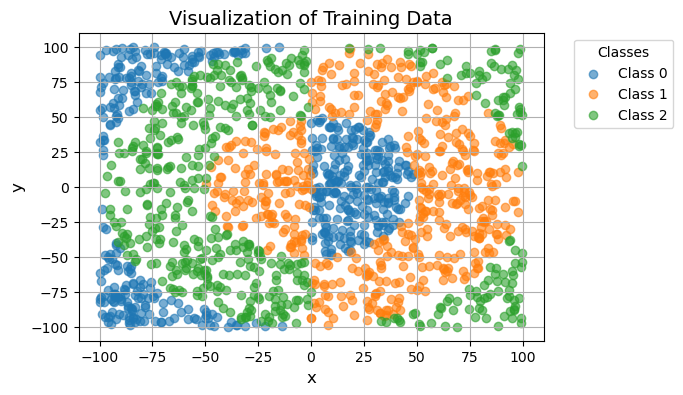

In [114]:
visualize_data(X_train_rings, Y_train_rings, num_classes=num_classes)

Epoch 0, Training Loss: 0.414791, Test Loss: 0.447410
Epoch 100, Training Loss: 0.283299, Test Loss: 0.283456
Epoch 200, Training Loss: 0.243914, Test Loss: 0.246662
Epoch 300, Training Loss: 0.200815, Test Loss: 0.202134
Epoch 400, Training Loss: 0.175195, Test Loss: 0.180689
Epoch 500, Training Loss: 0.156812, Test Loss: 0.163868
Epoch 600, Training Loss: 0.143336, Test Loss: 0.148433
Epoch 700, Training Loss: 0.132723, Test Loss: 0.135984
Epoch 800, Training Loss: 0.123902, Test Loss: 0.129792
Epoch 900, Training Loss: 0.115375, Test Loss: 0.120723
Epoch 1000, Training Loss: 0.107717, Test Loss: 0.113275
Epoch 1100, Training Loss: 0.101290, Test Loss: 0.108428
Epoch 1200, Training Loss: 0.097430, Test Loss: 0.105947
Epoch 1300, Training Loss: 0.094199, Test Loss: 0.101262
Epoch 1400, Training Loss: 0.088638, Test Loss: 0.096036
Epoch 1500, Training Loss: 0.085202, Test Loss: 0.094160
Epoch 1600, Training Loss: 0.082318, Test Loss: 0.090294
Epoch 1700, Training Loss: 0.080361, Test L

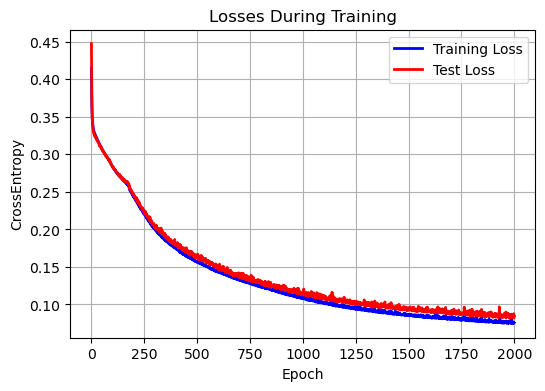

F-score on test set: 0.92


In [115]:
nn_rings=NeuralNetwork(layers=[2, 10, num_classes], task="classification", activation="sigmoid", weights_initialize="Xavier")
nn_rings.train(X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, optimizer="RMSprop",
               learning_rate=0.001, epochs=2000, verbose_interval=100, batch_size=32)


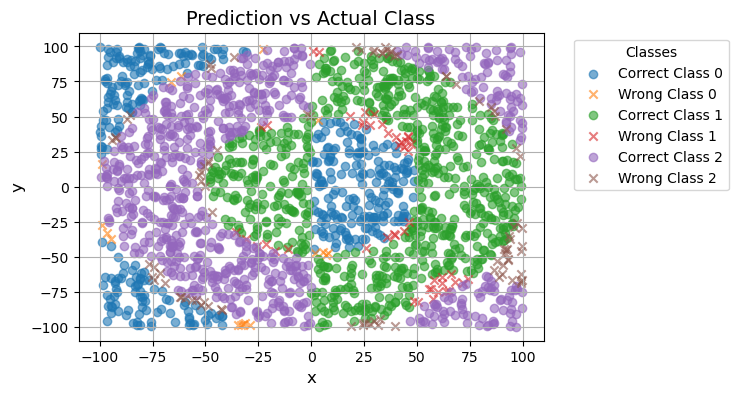

In [116]:
Y_pred=nn_rings.predict(X_test_rings)
visualize_predictions(X_test_rings, Y_test_rings, Y_pred, num_classes)

#### easy dataset

In [15]:
easy_training_path='data/easy-training.csv'
easy_test_path='data/easy-test.csv'

X_train_easy, Y_train_easy, X_test_easy, Y_test_easy, num_classes =load_data(easy_training_path, easy_test_path, encoding=True)
X_train_easy[:4], Y_train_easy[:4]

(array([[-72.82946124, -40.2393911 ],
        [-65.4643958 , -60.50151605],
        [ 14.38958854,  74.22399377],
        [-92.3356276 ,  17.46691559]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

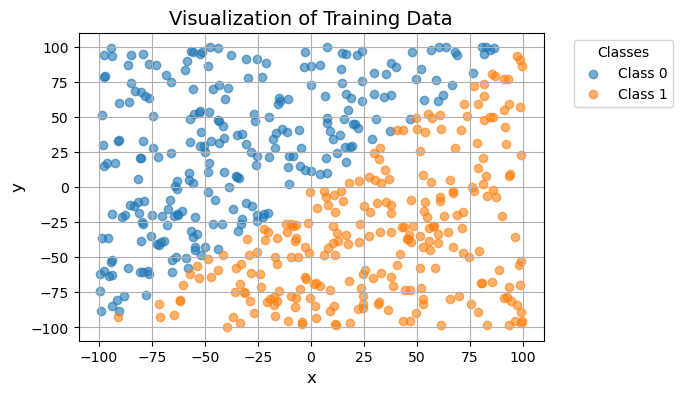

In [16]:
visualize_data(X_train_easy, Y_train_easy, num_classes)

Epoch 0, Training Loss: 0.371117, Test Loss: 0.390840
Epoch 100, Training Loss: 0.071397, Test Loss: 0.071696
Epoch 200, Training Loss: 0.021087, Test Loss: 0.020819
Epoch 300, Training Loss: 0.008565, Test Loss: 0.008226
Epoch 400, Training Loss: 0.004347, Test Loss: 0.003916
Epoch 500, Training Loss: 0.002925, Test Loss: 0.002638
Epoch 600, Training Loss: 0.002162, Test Loss: 0.002069
Epoch 700, Training Loss: 0.001654, Test Loss: 0.001655
Epoch 800, Training Loss: 0.001279, Test Loss: 0.001359
Epoch 900, Training Loss: 0.000933, Test Loss: 0.001034
Total training time: 0.55 seconds


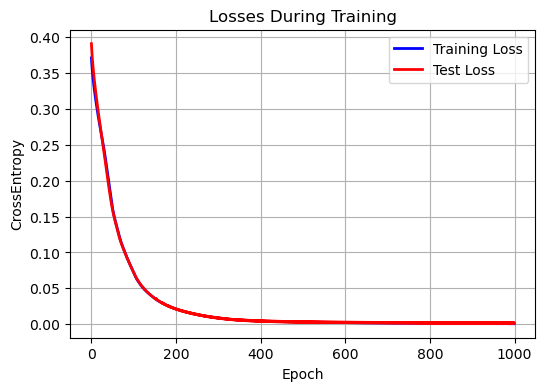

F-score on test set: 0.998


In [ ]:
nn_easy=NeuralNetwork(layers=[2, 10, num_classes], task="classification", activation="tanh", weights_initialize="Xavier")
nn_easy.train(X_train_easy, Y_train_easy, X_test_easy, Y_test_easy, optimizer="RMSprop",
               learning_rate=0.001, epochs=1000, verbose_interval=100, batch_size=None)

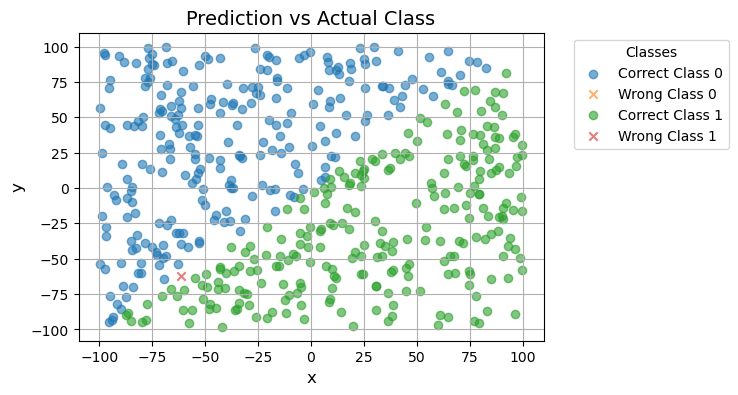

In [ ]:
Y_pred=nn_easy.predict(X_test_easy)
visualize_predictions(X_test_easy, Y_test_easy, Y_pred, num_classes)

#### xor3 dataset

In [281]:
xor_training_path='data/xor3-training.csv'
xor_test_path='data/xor3-test.csv'

X_train_xor, Y_train_xor, X_test_xor, Y_test_xor, num_classes =load_data(xor_training_path, xor_test_path, encoding=True)
X_train_xor[:4], Y_train_xor[:4]

(array([[ -5.72031611,  18.19865257],
        [ 50.03941883, -71.39036045],
        [ 93.07278106, -76.34025584],
        [ 10.43410017, -21.86327162]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

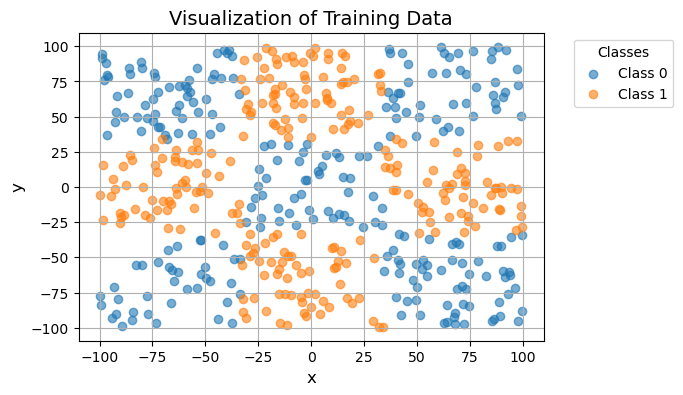

In [282]:
visualize_data(X_train_xor, Y_train_xor, num_classes)

In [283]:
scaler_X = MinMaxScaler()
X_train_xor_normalized = scaler_X.fit_transform(X_train_xor)
X_test_xor_normalized = scaler_X.transform(X_test_xor)

Epoch 0, Training Loss: 0.391694, Test Loss: 0.352961
Epoch 5000, Training Loss: 0.160479, Test Loss: 0.193694
Epoch 10000, Training Loss: 0.069114, Test Loss: 0.086368
Epoch 15000, Training Loss: 0.049795, Test Loss: 0.069751
Epoch 20000, Training Loss: 0.040272, Test Loss: 0.071051
Epoch 25000, Training Loss: 0.034165, Test Loss: 0.070798
Epoch 30000, Training Loss: 0.029863, Test Loss: 0.070958
Epoch 35000, Training Loss: 0.026298, Test Loss: 0.060530
Epoch 40000, Training Loss: 0.023710, Test Loss: 0.058768
Epoch 45000, Training Loss: 0.021608, Test Loss: 0.060030
Total training time: 37.13 seconds


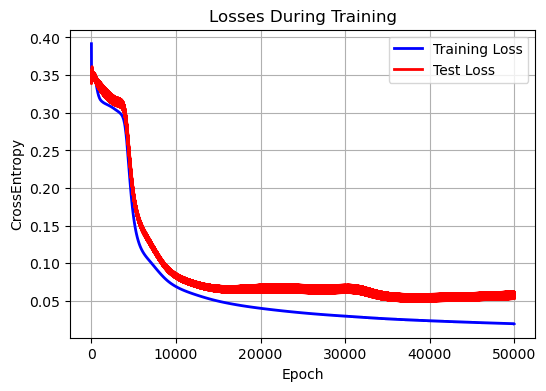

F-score on test set: 0.96


In [290]:
nn_xor=NeuralNetwork(layers=[2,16,num_classes], task="classification", 
                     activation="sigmoid", weights_initialize="Xavier")
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=50000, verbose_interval=5000, batch_size=None)

In [291]:
nn_xor.train(X_train_xor_normalized, Y_train_xor, X_test_xor_normalized, Y_test_xor, optimizer="RMSprop", 
               learning_rate=0.01, epochs=10000, verbose_interval=1000, batch_size=None, plot_training_loss=False)

Epoch 0, Training Loss: 0.019792, Test Loss: 0.062150
Epoch 1000, Training Loss: 0.019468, Test Loss: 0.062591
Epoch 2000, Training Loss: 0.019156, Test Loss: 0.062999
Epoch 3000, Training Loss: 0.018856, Test Loss: 0.063355
Epoch 4000, Training Loss: 0.018565, Test Loss: 0.063635
Epoch 5000, Training Loss: 0.018284, Test Loss: 0.063810
Epoch 6000, Training Loss: 0.018008, Test Loss: 0.063839
Epoch 7000, Training Loss: 0.017736, Test Loss: 0.063693
Epoch 8000, Training Loss: 0.017462, Test Loss: 0.063434
Epoch 9000, Training Loss: 0.017178, Test Loss: 0.063494
Total training time: 7.74 seconds
F-score on test set: 0.97


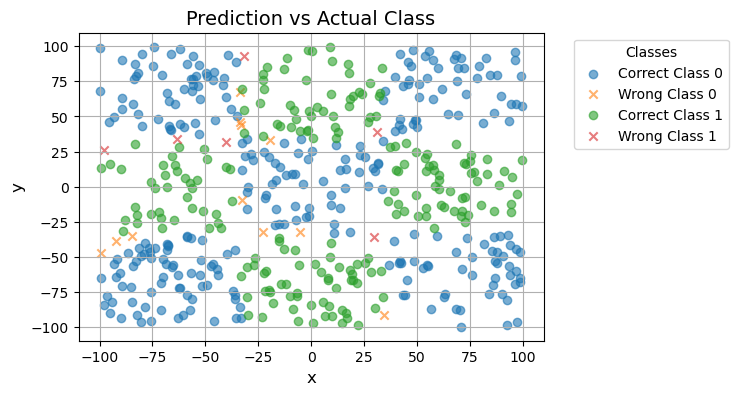

In [298]:
Y_pred = nn_xor.predict(X_test_xor_normalized)
visualize_predictions(X_test_xor, Y_test_xor, Y_pred, num_classes)

#### Testing different activation functions on last layer
on rings3 dataset

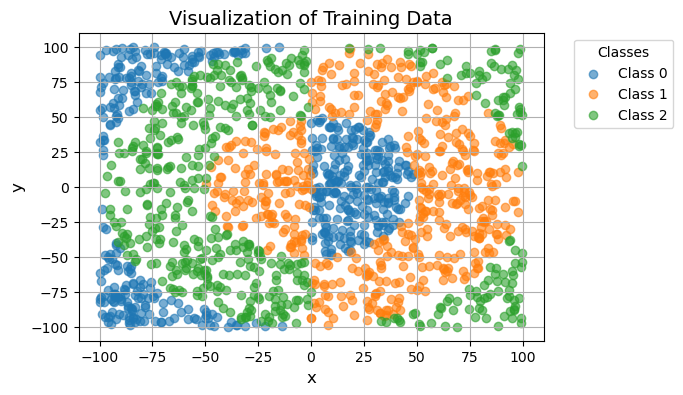

In [47]:
visualize_data(X_train_rings, Y_train_rings, num_classes=num_classes)

In [111]:
def visualize_multiple_predictions(X_test, Y_test, Y_pred_list, activation_names, num_classes):
    num_activations = len(activation_names)
    cols = 3
    rows = math.ceil(num_activations / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = np.array(axes)
    axes = axes.flatten()

    if Y_test.shape[1] > 1:
        Y_test_class = np.argmax(Y_test, axis=1)
    else:
        Y_test_class = Y_test.flatten()

    for idx, (ax, Y_pred, activation_name) in enumerate(zip(axes, Y_pred_list, activation_names)):
        ax.set_title(f"Activation: {activation_name}", fontsize=12)

        for class_label in range(num_classes):
            correct_data = X_test[(Y_test_class == class_label) & (Y_pred == class_label)]
            ax.scatter(correct_data[:, 0], correct_data[:, 1], label=f"Correct {class_label}", alpha=0.6, marker='o')

            wrong_data = X_test[(Y_test_class == class_label) & (Y_pred != class_label)]
            ax.scatter(wrong_data[:, 0], wrong_data[:, 1], label=f"Wrong {class_label}", alpha=0.6, marker='x')

        ax.set_xlabel("x", fontsize=10)
        ax.set_ylabel("y", fontsize=10)
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
        ax.grid(True)

    for idx in range(num_activations, len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

In [107]:
activations = ["softmax","linear", "sigmoid", "tanh", "relu"]
Y_pred=[]

for i, activation in enumerate(activations):
    nn = NeuralNetwork(
        layers=[2, 10, num_classes], 
        task="classification",
        activation="sigmoid",
        weights_initialize="Xavier",
        last_layer_activation=activation
    )
    print(f"Training with last layer activation: {activation}")
    
    nn.train(X_train_rings, Y_train_rings, X_test_rings, Y_test_rings, 
             optimizer="RMSprop", learning_rate=0.001, epochs=2000, 
             verbose=False, batch_size=32, plot_training_loss=False)
    Y_pred.append(nn.predict(X_test_rings))


Training with last layer activation: softmax
Total training time: 12.19 seconds
F-score on test set: 0.93
Training with last layer activation: linear
Total training time: 10.43 seconds
F-score on test set: 0.86
Training with last layer activation: sigmoid
Total training time: 12.58 seconds
F-score on test set: 0.86
Training with last layer activation: tanh
Total training time: 11.11 seconds
F-score on test set: 0.83
Training with last layer activation: relu
Total training time: 11.13 seconds
F-score on test set: 0.59


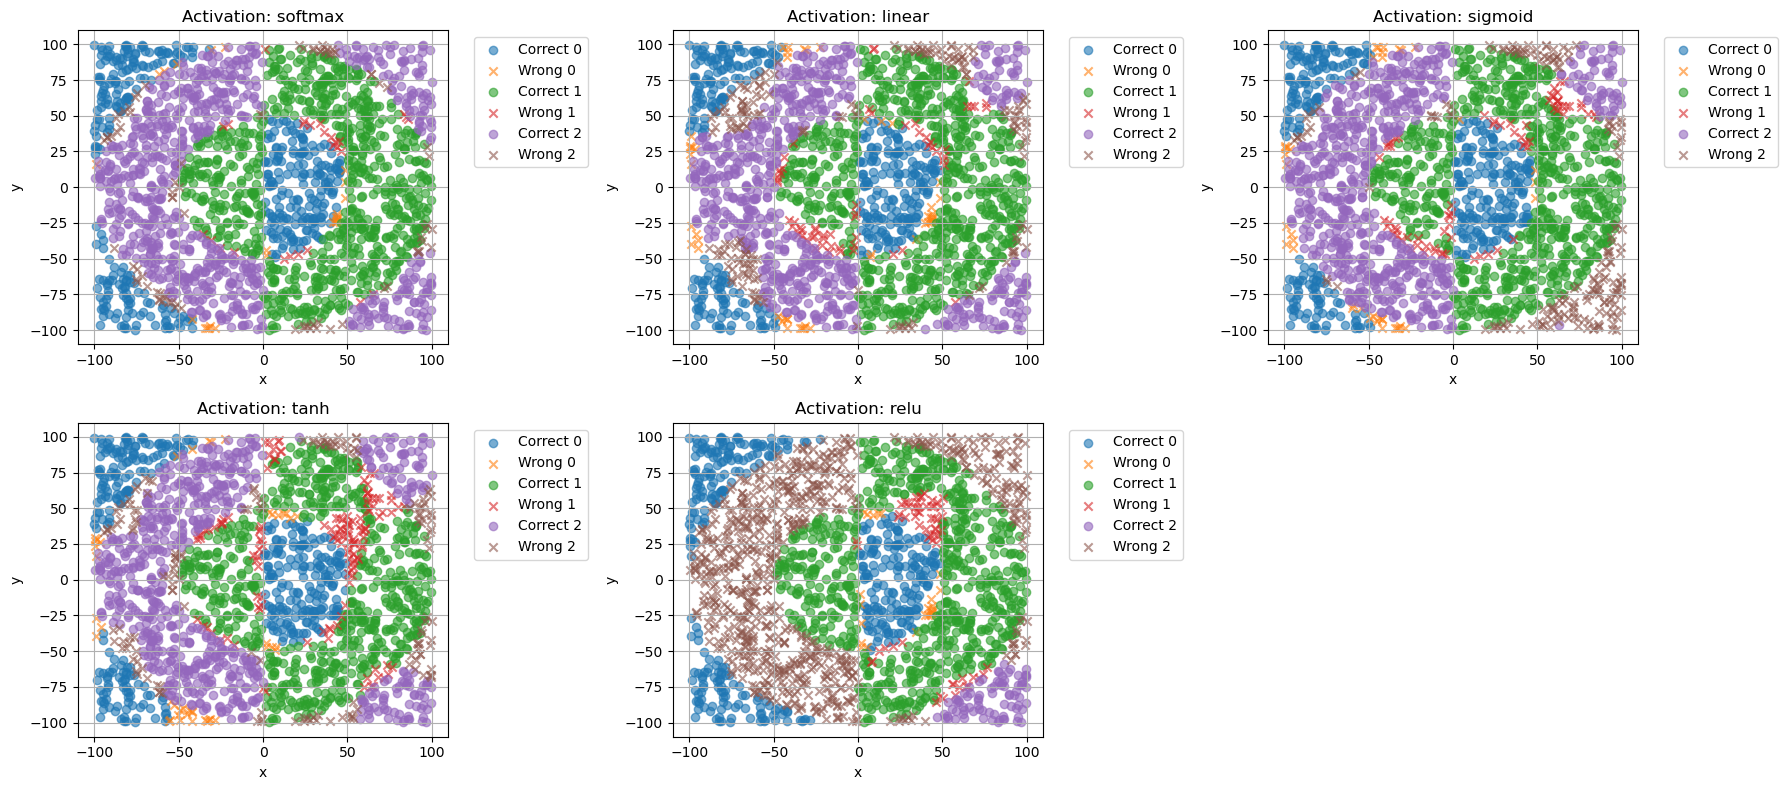

In [112]:
visualize_multiple_predictions(X_test_rings, Y_test_rings, Y_pred, activations, num_classes)